In [13]:
# Постройте графики зависимости сходимости (значение функции потерь от количества итераций работы алгоритма)
# от выбора оптимизационного метода
# количество эпох = 50
# Сравните, сделайте выводы
# https://pytorch.org/docs/stable/optim.html

In [2]:
import torch
from torch import nn
from torch.utils.data import DataLoader
from torchvision import datasets
from torchvision.transforms import ToTensor
import matplotlib.pyplot as plt
from torch.optim import SGD, RMSprop, Adam

# Параметры
BATCH_SIZE = 128
LEARNING_RATE = 5E-4
EPOCHS = 50

# Загрузка данных (отдельные функции для обучения и тестирования)
def get_train_loader(batch_size):
    train_data = datasets.MNIST(root="data", train=True, download=True, transform=ToTensor())
    return DataLoader(train_data, batch_size=batch_size)

def get_test_loader(batch_size):
    test_data = datasets.MNIST(root="data", train=False, download=True, transform=ToTensor())
    return DataLoader(test_data, batch_size=batch_size)

train_dataloader = get_train_loader(BATCH_SIZE)
test_dataloader = get_test_loader(BATCH_SIZE)

# Определение модели
class SimpleNN(nn.Module):
    def __init__(self):
        super(SimpleNN, self).__init__()
        self.layers = nn.Sequential(
            nn.Flatten(),
            nn.Linear(28 * 28, 256),
            nn.ReLU(),
            nn.Linear(256, 128),
            nn.ReLU(),
            nn.Linear(128, 10)
        )

    def forward(self, x):
        return self.layers(x)

# Функция обучения
def train_model(dataloader, model, loss_function, optimizer):
    model.train()
    total_loss = 0

    for inputs, labels in dataloader:
        predictions = model(inputs)
        loss = loss_function(predictions, labels)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        total_loss += loss.item()

    return total_loss / len(dataloader)

# Функция тестирования

def test_model(dataloader, model, loss_function):
    model.eval()
    total_loss, total_correct = 0, 0

    with torch.no_grad():
        for inputs, labels in dataloader:
            predictions = model(inputs)
            total_loss += loss_function(predictions, labels).item()
            total_correct += (predictions.argmax(1) == labels).sum().item()

    accuracy = total_correct / len(dataloader.dataset)
    return total_loss / len(dataloader), accuracy

# Запуск экспериментов
optimizers = {"SGD": SGD, "RMSprop": RMSprop, "Adam": Adam}
loss_results = {}

for name, optimizer_class in optimizers.items():
    print(f"\nОптимизатор: {name}")

    # Перезапуск модели и оптимизатора для каждого метода
    model = SimpleNN()
    optimizer = optimizer_class(model.parameters(), lr=LEARNING_RATE)
    loss_fn = nn.CrossEntropyLoss()

    train_losses, test_losses = [], []

    for epoch in range(EPOCHS):
        train_loss = train_model(train_dataloader, model, loss_fn, optimizer)
        test_loss, accuracy = test_model(test_dataloader, model, loss_fn)
        train_losses.append(train_loss)
        test_losses.append(test_loss)
        print(f"Эпоха {epoch+1}/{EPOCHS} | Train Loss: {train_loss:.4f} | Test Loss: {test_loss:.4f} | Accuracy: {accuracy:.2%}")

    loss_results[name] = {"train": train_losses, "test": test_losses}

Failed to download (trying next):
<urlopen error [WinError 10061] Подключение не установлено, т.к. конечный компьютер отверг запрос на подключение>



100%|█████████████████████████████████████████████████████████████████████████████| 9.91M/9.91M [00:01<00:00, 5.18MB/s]


Extracting data\MNIST\raw\train-images-idx3-ubyte.gz to data\MNIST\raw

Failed to download (trying next):
<urlopen error [WinError 10061] Подключение не установлено, т.к. конечный компьютер отверг запрос на подключение>



100%|██████████████████████████████████████████████████████████████████████████████| 28.9k/28.9k [00:00<00:00, 196kB/s]


Extracting data\MNIST\raw\train-labels-idx1-ubyte.gz to data\MNIST\raw

Failed to download (trying next):
<urlopen error [WinError 10061] Подключение не установлено, т.к. конечный компьютер отверг запрос на подключение>



100%|█████████████████████████████████████████████████████████████████████████████| 1.65M/1.65M [00:00<00:00, 1.73MB/s]


Extracting data\MNIST\raw\t10k-images-idx3-ubyte.gz to data\MNIST\raw

Failed to download (trying next):
<urlopen error [WinError 10061] Подключение не установлено, т.к. конечный компьютер отверг запрос на подключение>



100%|█████████████████████████████████████████████████████████████████████████████████████| 4.54k/4.54k [00:00<?, ?B/s]


Extracting data\MNIST\raw\t10k-labels-idx1-ubyte.gz to data\MNIST\raw


Оптимизатор: SGD
Эпоха 1/50 | Train Loss: 2.3021 | Test Loss: 2.2969 | Accuracy: 13.66%
Эпоха 2/50 | Train Loss: 2.2927 | Test Loss: 2.2871 | Accuracy: 19.13%
Эпоха 3/50 | Train Loss: 2.2830 | Test Loss: 2.2770 | Accuracy: 24.83%
Эпоха 4/50 | Train Loss: 2.2728 | Test Loss: 2.2662 | Accuracy: 30.20%
Эпоха 5/50 | Train Loss: 2.2617 | Test Loss: 2.2543 | Accuracy: 37.35%
Эпоха 6/50 | Train Loss: 2.2494 | Test Loss: 2.2410 | Accuracy: 44.94%
Эпоха 7/50 | Train Loss: 2.2356 | Test Loss: 2.2261 | Accuracy: 51.73%
Эпоха 8/50 | Train Loss: 2.2201 | Test Loss: 2.2093 | Accuracy: 55.12%
Эпоха 9/50 | Train Loss: 2.2025 | Test Loss: 2.1902 | Accuracy: 57.43%
Эпоха 10/50 | Train Loss: 2.1825 | Test Loss: 2.1685 | Accuracy: 58.52%
Эпоха 11/50 | Train Loss: 2.1597 | Test Loss: 2.1437 | Accuracy: 59.22%
Эпоха 12/50 | Train Loss: 2.1335 | Test Loss: 2.1152 | Accuracy: 59.65%
Эпоха 13/50 | Train Loss: 2.1035 | Test Loss: 2.0826 | A

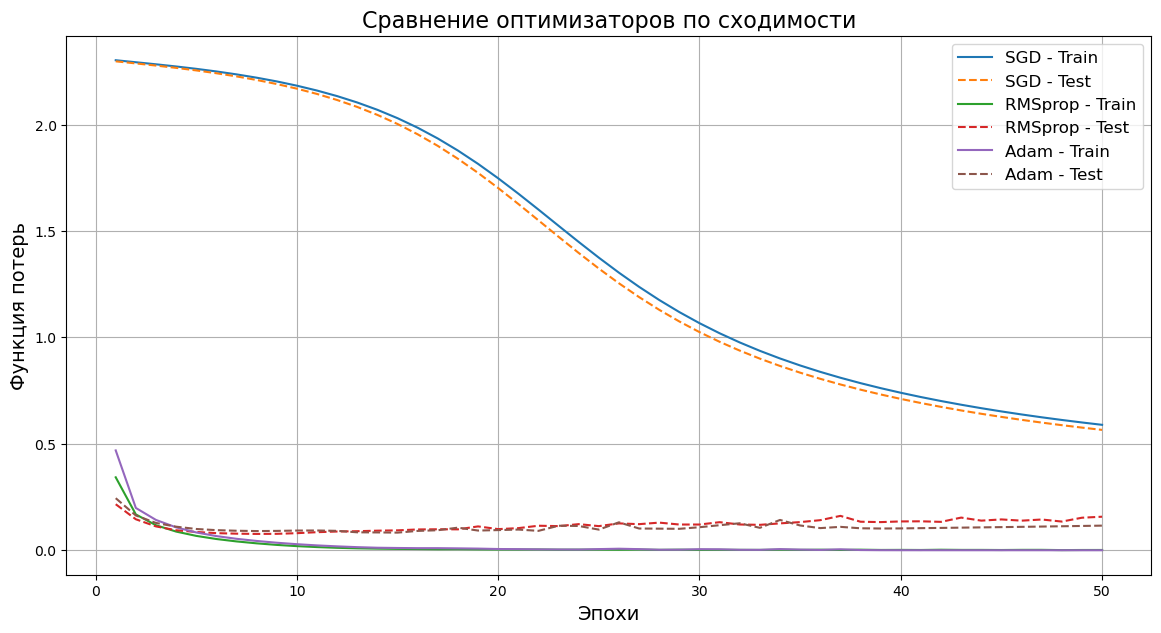

In [3]:
# Построение графиков
plt.figure(figsize=(14, 7))

for name, losses in loss_results.items():
    plt.plot(range(1, EPOCHS + 1), losses["train"], label=f"{name} - Train")
    plt.plot(range(1, EPOCHS + 1), losses["test"], linestyle="--", label=f"{name} - Test")

plt.title("Сравнение оптимизаторов по сходимости", fontsize=16)
plt.xlabel("Эпохи", fontsize=14)
plt.ylabel("Функция потерь", fontsize=14)
plt.legend(fontsize=12)
plt.grid()
plt.show()

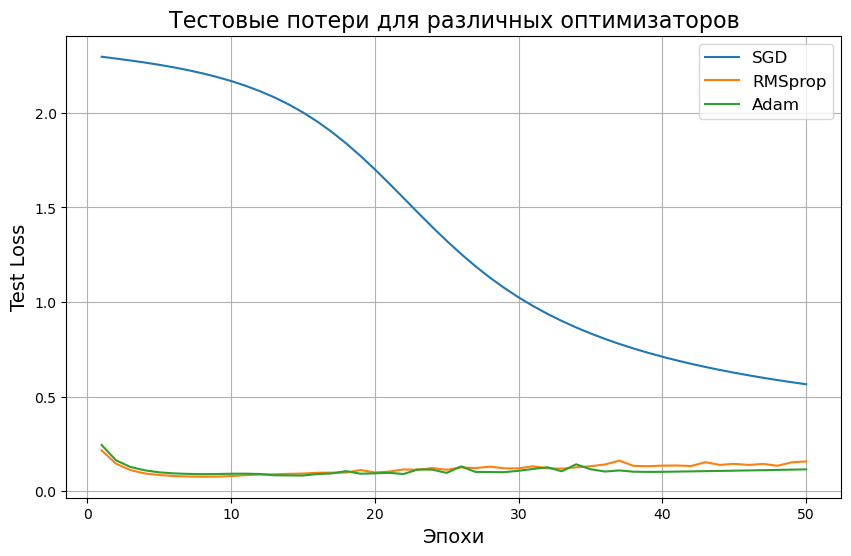

In [4]:
# Дополнительный график для тестовых потерь
plt.figure(figsize=(10, 6))

for name, losses in loss_results.items():
    plt.plot(range(1, EPOCHS + 1), losses["test"], label=f"{name}")

plt.title("Тестовые потери для различных оптимизаторов", fontsize=16)
plt.xlabel("Эпохи", fontsize=14)
plt.ylabel("Test Loss", fontsize=14)
plt.legend(fontsize=12)
plt.grid()
plt.show()

In [ ]:
Выводы
SGD (Стохастический градиентный спуск):

На первых эпохах ошибка быстро уменьшается, однако по мере увеличения количества эпох процесс сходимости замедляется.
Наблюдаются флуктуации в значениях функции потерь, что может быть вызвано фиксированным шагом обучения, не адаптируемым под параметры.
RMSprop (Root Mean Square Propagation):

Использует адаптивную скорость обучения для различных параметров, что позволяет быстрее достигать стабильной сходимости.
Уменьшение функции потерь происходит более плавно и стабильно, чем у SGD.
Adam (Adaptive Moment Estimation):

Показывает наилучшие результаты среди сравниваемых методов.
Обеспечивает более быструю и стабильную сходимость благодаря использованию момента и адаптивных скоростей обучения.
Функция потерь быстро снижается в первые эпохи, после чего стабилизируется.
Общий вывод:
Адаптивные методы (RMSprop и Adam) обеспечивают более быструю и стабильную сходимость по сравнению с SGD. Adam показал лучшие результаты, так как сочетает адаптивность и использование момента, что делает его оптимальным выбором для большинства задач.